In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# funkcja 3 - (x-2)^2 - (y-4)^2
# dla niej maksimu jest w punkcie (2,4)
def f(x,y):
    z = 3 - (x-2)**2 - (y-4)**2
    return z
#pochodne cząstkowe
def pfx(w):
    a = (-2)*w[0] + 4
    return a
def pfy(w):
    a = (-2)*w[1] + 8
    return a

In [3]:
# Dane
x = np.linspace(0, 4, 100)
y = np.linspace(2, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

In [4]:
def euk(w): #długość wektora
    return math.sqrt(sum(math.pow(i,2) for i in w))

def maksimum(fun,pfx,pfy,w0):
    x0 = pfx(w0)
    y0 = pfy(w0)
    w = np.array([x0,y0])
    while euk(w) > 0.1:
        w[0] = pfx(w0)
        w[1] = pfy(w0)
        w0 += 0.5*w
        print(w)
    return w0

In [5]:
w0 = np.array([3.0,3.0])
m = maksimum(f,pfx,pfy,w0)
m

[-2.  2.]
[0. 0.]


array([2., 4.])

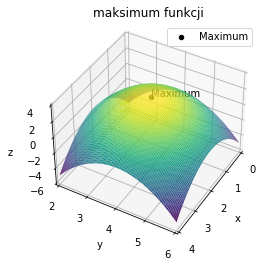

In [28]:
#Rysowanie
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_wireframe(X, Y, Z, color='black')
ax.set_zlim3d(-6, 4)
ax.set_ylim3d(2, 6)                  
ax.set_xlim3d(0, 4)  
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none', zorder=0)
ax.scatter3D(m[0], m[1], f(m[0], m[1]), c="black", label='Maximum', zorder=1)
ax.text(m[0], m[1], f(m[0], m[1]), "Maximum", zorder=1, color="black")
ax.legend()
ax.set_title("maksimum funkcji")
ax.view_init(40, 30) #Kąt pod jakim patrzymy
plt.savefig('analiza_wyk.pdf')
plt.show()